In [86]:
import pandas as pd 
import numpy as np

In [87]:
!pip install openpyxl

In [109]:
path = r'D:\DATA MINING\online+retail\Online Retail.xlsx'
df = pd.read_excel(path, sheet_name='Online Retail')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [111]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [112]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [113]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [114]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [115]:
df1 = df.dropna(subset=['CustomerID'])
df1['CustomerID'] = df1['CustomerID'].astype(str)  # Ép lại kiểu sau khi xoá NaN


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13824\1849675003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CustomerID'] = df1['CustomerID'].astype(str)  # Ép lại kiểu sau khi xoá NaN


In [118]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13824\3563861935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])


In [119]:
df1['InvoiceNo'] = df1['InvoiceNo'].astype(str)
df1 = df1[~df1['InvoiceNo'].str.startswith('C')]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13824\1647007508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceNo'] = df1['InvoiceNo'].astype(str)


array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'InvoiceDate'}>],
       [<Axes: title={'center': 'UnitPrice'}>, <Axes: >]], dtype=object)

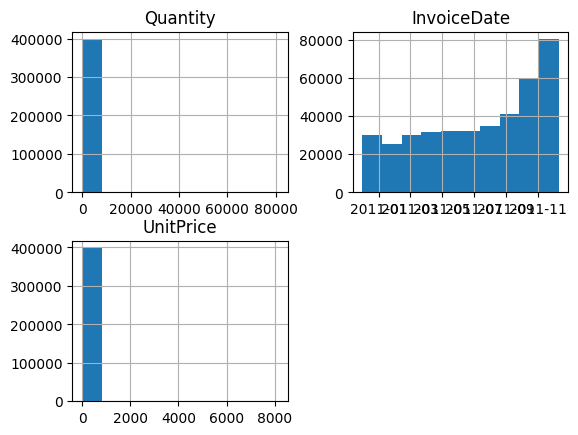

In [120]:
df1.hist()

In [122]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [123]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [124]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice
count,397924.000000,397924,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174
min,1.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 14:39:00,1.950000
75%,12.000000,2011-10-20 14:33:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,180.420210,NaN,22.096788


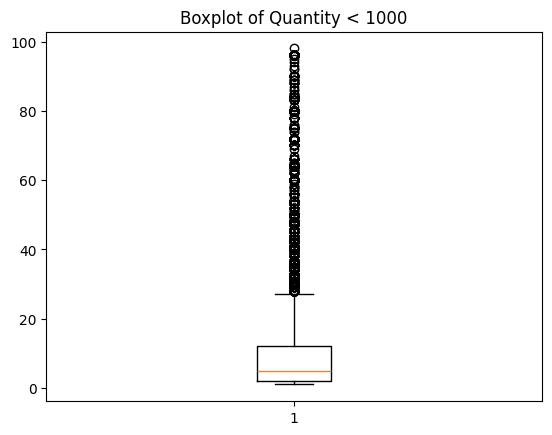

In [139]:
import matplotlib.pyplot as plt

# Lọc dữ liệu Quantity < 1000 trên df
df_filtered = df1[df1['Quantity'] < 100]
df_filtered = df_filtered[df_filtered['Quantity'] > 0]
# Vẽ boxplot cho cột Quantity
plt.boxplot(df_filtered['Quantity'])
plt.title('Boxplot of Quantity < 1000')
plt.show()

In [146]:
display(df_filtered.shape,df1.shape)

(391458, 8)

(397924, 8)

In [148]:
df1 = df_filtered
df1.describe()

,Quantity,InvoiceDate,UnitPrice
count,391458.000000,391458,391458.000000
mean,9.211139,2011-07-11 03:01:36.538479104,3.144499
min,1.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-07 11:16:00,1.250000
50%,5.000000,2011-07-31 15:22:00,1.950000
75%,12.000000,2011-10-20 18:08:00,3.750000
max,98.000000,2011-12-09 12:50:00,8142.750000
std,12.334709,NaN,22.276820


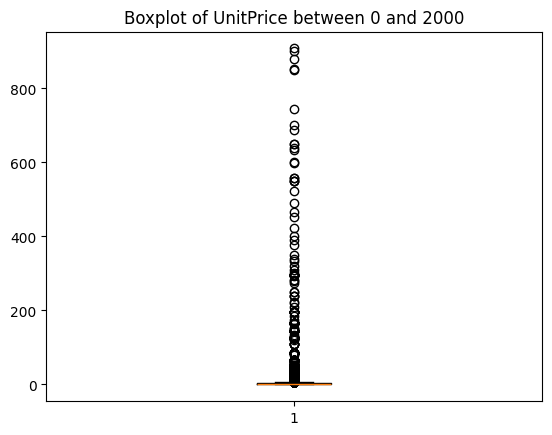

In [ ]:
df1 = df1[(df1['UnitPrice'] > 0) & (df1['UnitPrice'] < 1000)]

plt.boxplot(df1['UnitPrice'])
plt.title('Boxplot of UnitPrice between 0 and 1000')
plt.show()


In [162]:
df1.drop_duplicates(inplace=True)

In [163]:
display(df1.info(), df1.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 386215 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    386215 non-null  object        
 1   StockCode    386215 non-null  object        
 2   Description  386215 non-null  object        
 3   Quantity     386215 non-null  int64         
 4   InvoiceDate  386215 non-null  datetime64[ns]
 5   UnitPrice    386215 non-null  float64       
 6   CustomerID   386215 non-null  object        
 7   Country      386215 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 26.5+ MB


None

,Quantity,InvoiceDate,UnitPrice
count,386215.000000,386215,386215.000000
mean,9.299502,2011-07-10 22:29:58.675142144,3.023688
min,1.000000,2010-12-01 08:26:00,0.001000
25%,2.000000,2011-04-07 11:16:00,1.250000
50%,5.000000,2011-07-31 13:13:00,1.950000
75%,12.000000,2011-10-20 14:11:30,3.750000
max,98.000000,2011-12-09 12:50:00,908.160000
std,12.379356,NaN,7.089148
